# Mini Project 3 - Topic Modelling

In [1]:
# Import Package

# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

# Spacy
import spacy

# NLTK
import nltk
from collections import Counter

# Regular expression
import regex as re
from urllib.parse import unquote
import urllib3

# BeautifulSoup
from bs4 import BeautifulSoup

# Processer
import multiprocessing
import os

# Word embeding
import gensim.models.word2vec as w2v

# sklearn
import sklearn.manifold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Generator
import random

#Avoid some version change warnings
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## Extract Data From Url

In [4]:
# specify the url
quote_page = 'https://en.wikipedia.org/wiki/Cryptocurrency'

In [5]:
# query the website and return the html to the variable ‘page’
http = urllib3.PoolManager()
r = http.request('GET', quote_page)
if r.status == 200:
    page = r.data
    print('Type of the variable \'page\':', page.__class__.__name__)
    print('Page Retrieved. Request Status: %d, Page Size: %d' % (r.status, len(page)))
else:
    print('Some problem occurred. Request Status: %s' % r.status)

Type of the variable 'page': bytes
Page Retrieved. Request Status: 200, Page Size: 411890


In [6]:
# parse the html using beautiful soup and store in variable `soup`
soup = BeautifulSoup(page, 'html.parser')
print('Type of the variable \'soup\':', soup.__class__.__name__)

Type of the variable 'soup': BeautifulSoup


In [7]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Cryptocurrency - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"cdc09b13-4462-4524-9172-667343151604","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Cryptocurrency","wgTitle":"Cryptocurrency","wgCurRevisionId":1054333931,"wgRevisionId":1054333931,"wgArticleId":36662188,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","Webarchive template wayback links","CS1 errors: generic title","CS1 errors: missing title","CS1 errors: bare 

In [8]:
print('Title tag :%s:' % soup.title)
print('Title text:%s:' % soup.title.string)

Title tag :<title>Cryptocurrency - Wikipedia</title>:
Title text:Cryptocurrency - Wikipedia:


In [12]:
article_tag = 'div'
class_name ={"class": "mw-body"}
# id_name ={'id':'content'}
article = soup.find_all(article_tag, class_name)[0]
# article = soup.find_all(article_tag, id_name)[0]
print('Type of the variable \'article\':', article.__class__.__name__)

Type of the variable 'article': Tag


In [13]:
soup.find_all(article_tag, class_name)

[<div class="mw-body" id="content" role="main">
 <a id="top"></a>
 <div id="siteNotice"><!-- CentralNotice --></div>
 <div class="mw-indicators">
 <div class="mw-indicator" id="mw-indicator-pp-default"><a href="/wiki/Wikipedia:Protection_policy#semi" title="This article is semi-protected."><img alt="Page semi-protected" data-file-height="512" data-file-width="512" decoding="async" height="20" src="//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/30px-Semi-protection-shackle.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/40px-Semi-protection-shackle.svg.png 2x" width="20"/></a></div>
 </div>
 <h1 class="firstHeading" id="firstHeading">Cryptocurrency</h1>
 <div class="vector-body" id="bodyContent">
 <div class="noprint" id="siteSub">From Wikipedia, the free encyclopedia</div>
 <div id="contentSub"></di

In [14]:
rawtext = article.text
rawtext

'\n\n\n\n\n\nCryptocurrency\n\nFrom Wikipedia, the free encyclopedia\n\n\n\nJump to navigation\nJump to search\nEncrypted medium of digital exchange\nNot to be confused with Virtual currency.\n\n\n A logo for Bitcoin, the first decentralized cryptocurrency\nA cryptocurrency, crypto-currency, or crypto is a collection of binary data which is designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger which is a computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership.[1][2][3] Cryptocurrencies are generally fiat currencies, as they are not backed by or convertible into a commodity.[4] Some crypto schemes use validators to maintain the cryptocurrency. In a proof-of-stake model, owners put up their tokens as collateral. In return, they get authority over the token in proportion to the amount they stake. Generally, these token stakers

## Data Cleaning

In [15]:
def clean_text(rawtext):
#     # remove URLs
#     rawtext = re.sub(r'http\S+\s*', '', rawtext)
#     # remove RT and cc
#     rawtext = re.sub(r'RT|cc', '', rawtext)
    # remove digit number
    rawtext = re.sub(r'\d+', '', rawtext)
#     # remove hashtags
#     rawtext = re.sub(r'#\S+', '', rawtext)
#     # remove mentions
#     rawtext = re.sub(r'@\S+', '', rawtext)
    # remove punctuations
#     rawtext = re.sub('[!"#\$%&\'()*.,+-/:;<=>?@[\\]^_`{|}~]+', '', rawtext)
#     # remove this symbol
#     rawtext = re.sub('[\b$1\\l$2\b]', '', rawtext)
#     rawtext = re.sub('$', '', rawtext)
#     # remove extra whitespace
#     rawtext = re.sub(r'\s+', ' ', rawtext)
#     # remove extra whitespace at end of string
#     rawtext = re.sub(r'\s+$', '', rawtext)
    # remove redundant newlines
    rawtext = re.sub(r'\n\n+', '\n', rawtext)
    rawtext = re.sub(r'\n', '', rawtext)
    # remove uppercase
    rawtext = re.sub(r'([A-Z])([A-Z]+)\b', '', str(rawtext).lower())
#     # Remove Emails
#     rawtext = re.sub('\S*@\S*\s?', '', rawtext)

    return rawtext

output = clean_text(rawtext)

# assert output == desired_output, 'Not equal!'

In [16]:
# no need to print output here, text too long.
# print(output,'.')

In [17]:
cleantext = clean_text(rawtext)

In [18]:
cleantext

'cryptocurrencyfrom wikipedia, the free encyclopediajump to navigationjump to searchencrypted medium of digital exchangenot to be confused with virtual currency. a logo for bitcoin, the first decentralized cryptocurrencya cryptocurrency, crypto-currency, or crypto is a collection of binary data which is designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger which is a computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership.[][][] cryptocurrencies are generally fiat currencies, as they are not backed by or convertible into a commodity.[] some crypto schemes use validators to maintain the cryptocurrency. in a proof-of-stake model, owners put up their tokens as collateral. in return, they get authority over the token in proportion to the amount they stake. generally, these token stakers get additional ownership in the token ove

### Web scrapping

In [19]:
# # show the first 500 characters after removing redundant newlines
# print(re.sub(r'\n\n+', '\n', rawtext)[:1000])

In [20]:
# #for t in article.find_all('a'):
#     print(t)

In [21]:
# # identify the type of tag to retrieve
# link_tag = 'a'

# # create a list with the links from the `<a>` tag
# tag_list = []
# for t in article.find_all(link_tag):
#     tag_list.append(t.get('href'))

# # List comprehension version:
# # tag_list = [t.get('href') for t in article.find_all(link_tag)]

# print('Size of \'tag_list\':', len(tag_list))
# tag_list

In [22]:
# # keep only the links to the wiki itself
# wiki_tag_list = []
# for link in tag_list:
#     if link is not None and link[:6] == '/wiki/':
#         wiki_link = link[6:]
#         wiki_tag_list.append(wiki_link)

# # List comprehension:
# # wiki_tag_list = [link[6:] for link in tag_list if link is not None and link[:6] == '/wiki/']

# print('Size of \'wiki_tag_list\':', len(wiki_tag_list))
# wiki_tag_list

In [23]:
# # create a filter for undesired links
# filter  = '(%s)' % '|'.join([
#     'Bitcoin_ATM',
#     'Category:',
#     'File:',
#     'Help:',
#     'Portal:',
#     'action=',
#     'Special:',
#     'Key:'
# ])
# # remove the links that are found in the filter
# filtered_tag_list = []
# for t in wiki_tag_list:
#     if not re.search(filter, t):
#         filtered_tag_list.append(t)

# # filtered_tag_list = [t for t in wiki_tag_list if not re.search(filter, t)]
# print('Size of \'filtered_tag_list\':', len(filtered_tag_list))
# filtered_tag_list

In [24]:
# # remove duplicates
# unique_tag_list = list(set(filtered_tag_list))
# print('Size of \'unique_tag_list\':', len(unique_tag_list))
# unique_tag_list

In [25]:
# # convert escaped sequences
# unquoted_tag_list = [unquote(t) for t in unique_tag_list]
# print('Size of \'unquoted_tag_list\':', len(unquoted_tag_list))
# unquoted_tag_list

In [26]:
# # convert underscore to space
# spaced_tag_list = []
# for tag in unquoted_tag_list:
#     processed_tag = re.sub('_', ' ', tag)
#     spaced_tag_list.append(processed_tag)

# # spaced_tag_list = [re.sub('_', ' ', t) for t in unquoted_tag_list]
# print('Size of \'tag_list\':', len(spaced_tag_list))
# spaced_tag_list

In [27]:
# # order the list
# spaced_tag_list.sort()
# print('Size of \'spaced_tag_list\':', len(spaced_tag_list))
# cleantext = spaced_tag_list

### Helper Function

In [28]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)
    
    for i, label in enumerate(val[:top]):
        plt.text(i, label, label, ha='center', va='bottom') 

    plt.show()

##  EDA by SpaCy 
spaCy does the processing of the text as part of the reading of the data.

In [29]:
# load spaCy and the English model
nlp = spacy.load('en_core_web_lg')

# process the text
doc = nlp(cleantext)

In [30]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

 1| 'cryptocurrencyfrom'
 2| 'wikipedia'
 3| ','
 4| 'the'
 5| 'free'
 6| 'encyclopediajump'
 7| 'to'
 8| 'navigationjump'
 9| 'to'
10| 'searchencrypted'
11| 'medium'
12| 'of'
13| 'digital'
14| 'exchangenot'
15| 'to'
16| 'be'
17| 'confused'
18| 'with'
19| 'virtual'
20| 'currency'
21| '.'


In [31]:
## spaCy (STOP WORD)
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'cryptocurrencyfrom' 'cryptocurrencyfrom'
 2| 'wikipedia'     'wikipedia'
 3| ','             ','
 4| 'the'           ''
 5| 'free'          'free'
 6| 'encyclopediajump' 'encyclopediajump'
 7| 'to'            ''
 8| 'navigationjump' 'navigationjump'
 9| 'to'            ''
10| 'searchencrypted' 'searchencrypted'
11| 'medium'        'medium'
12| 'of'            ''
13| 'digital'       'digital'
14| 'exchangenot'   'exchangenot'
15| 'to'            ''
16| 'be'            ''
17| 'confused'      'confused'
18| 'with'          ''
19| 'virtual'       'virtual'
20| 'currency'      'currency'
21| '.'             '.'


In [32]:
## spaCy (Lemmatisation)
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'cryptocurrencyfrom' 'cryptocurrencyfrom'
 2| 'wikipedia'  'wikipedia'
 3| ','          ','
 4| 'the'        'the'
 5| 'free'       'free'
 6| 'encyclopediajump' 'encyclopediajump'
 7| 'to'         'to'
 8| 'navigationjump' 'navigationjump'
 9| 'to'         'to'
10| 'searchencrypted' 'searchencrypte'
11| 'medium'     'medium'
12| 'of'         'of'
13| 'digital'    'digital'
14| 'exchangenot' 'exchangenot'
15| 'to'         'to'
16| 'be'         'be'
17| 'confused'   'confuse'
18| 'with'       'with'
19| 'virtual'    'virtual'
20| 'currency'   'currency'
21| '.'          '.'


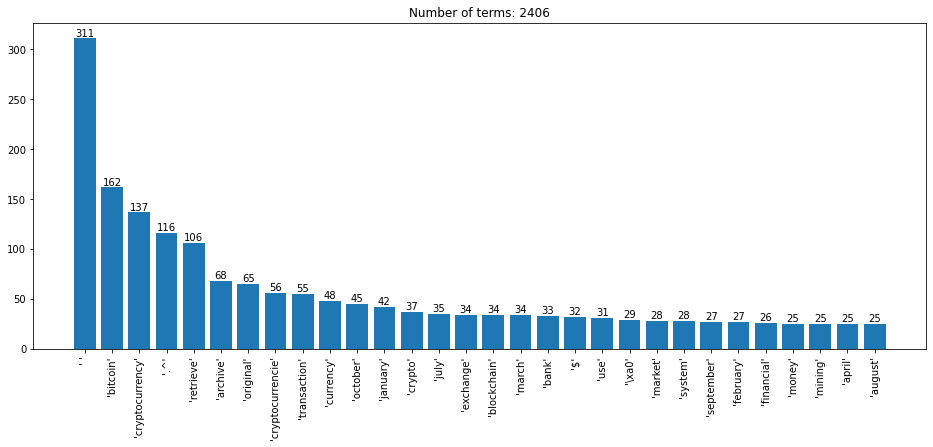

In [33]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

## EDA by NLTK 


In [34]:
# use nltk to find tokens
tokens = nltk.word_tokenize(cleantext)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'cryptocurrencyfrom'
 2| 'wikipedia'
 3| ','
 4| 'the'
 5| 'free'
 6| 'encyclopediajump'
 7| 'to'
 8| 'navigationjump'
 9| 'to'
10| 'searchencrypted'
11| 'medium'
12| 'of'
13| 'digital'
14| 'exchangenot'
15| 'to'
16| 'be'
17| 'confused'
18| 'with'
19| 'virtual'
20| 'currency'
21| '.'
22| 'a'
23| 'logo'
24| 'for'
25| 'bitcoin'


In [35]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [36]:
tokens_no_stop = [t for t in tokens if t.lower() not in stopWords]

In [37]:
tokens_no_stop

['cryptocurrencyfrom',
 'wikipedia',
 ',',
 'free',
 'encyclopediajump',
 'navigationjump',
 'searchencrypted',
 'medium',
 'digital',
 'exchangenot',
 'confused',
 'virtual',
 'currency',
 '.',
 'logo',
 'bitcoin',
 ',',
 'first',
 'decentralized',
 'cryptocurrencya',
 'cryptocurrency',
 ',',
 'crypto-currency',
 ',',
 'crypto',
 'collection',
 'binary',
 'data',
 'designed',
 'work',
 'medium',
 'exchange',
 'wherein',
 'individual',
 'coin',
 'ownership',
 'records',
 'stored',
 'ledger',
 'computerized',
 'database',
 'using',
 'strong',
 'cryptography',
 'secure',
 'transaction',
 'records',
 ',',
 'control',
 'creation',
 'additional',
 'coins',
 ',',
 'verify',
 'transfer',
 'coin',
 'ownership',
 '.',
 '[',
 ']',
 '[',
 ']',
 '[',
 ']',
 'cryptocurrencies',
 'generally',
 'fiat',
 'currencies',
 ',',
 'backed',
 'convertible',
 'commodity',
 '.',
 '[',
 ']',
 'crypto',
 'schemes',
 'use',
 'validators',
 'maintain',
 'cryptocurrency',
 '.',
 'proof-of-stake',
 'model',
 ',',
 '

In [38]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'cryptocurrencyfrom' 'cryptocurrencyfrom'
 2| 'wikipedia'     'wikipedia'
 3| ','             ','
 4| 'the'          
 5| 'free'          'free'
 6| 'encyclopediajump' 'encyclopediajump'
 7| 'to'           
 8| 'navigationjump' 'navigationjump'
 9| 'to'           
10| 'searchencrypted' 'searchencrypted'
11| 'medium'        'medium'
12| 'of'           
13| 'digital'       'digital'
14| 'exchangenot'   'exchangenot'
15| 'to'           
16| 'be'           
17| 'confused'      'confused'
18| 'with'         
19| 'virtual'       'virtual'
20| 'currency'      'currency'
21| '.'             '.'


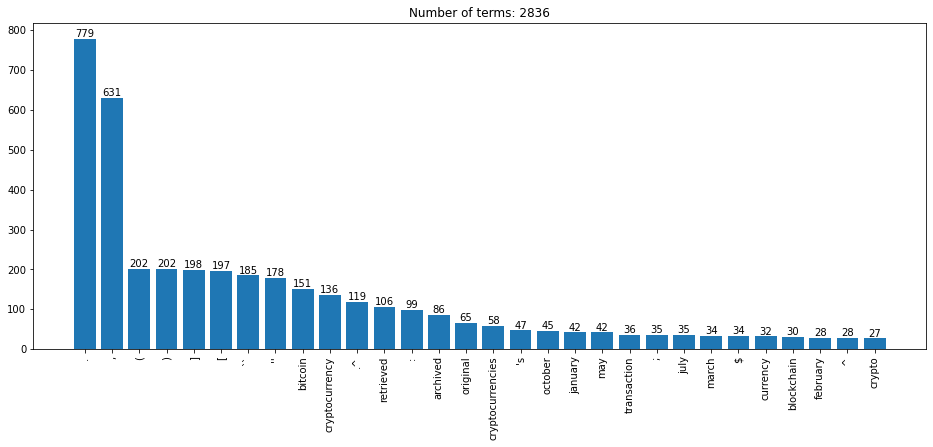

In [39]:
plot_words(tokens_no_stop, top = 30)

In [40]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in cleantext.split()])

In [41]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in cleantext.split()])

In [42]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'cryptocurrencyfrom'   'cryptocurrencyfrom'
 2| 'wikipedia,'   'wikipedia,'
 3| 'the'          'the'       
 4| 'free'         'free'      
 5| 'encyclopediajump'   'encyclopediajump'
 6| 'to'           'to'        
 7| 'navigationjump'   'navigationjump'
 8| 'to'           'to'        
 9| 'searchencrypt'   'searchencrypted'
10| 'medium'       'medium'    
11| 'of'           'of'        
12| 'digit'        'digital'   
13| 'exchangenot'   'exchangenot'
14| 'to'           'to'        
15| 'be'           'be'        
16| 'confus'       'confused'  
17| 'with'         'with'      
18| 'virtual'      'virtual'   
19| 'currency.'    'currency.' 


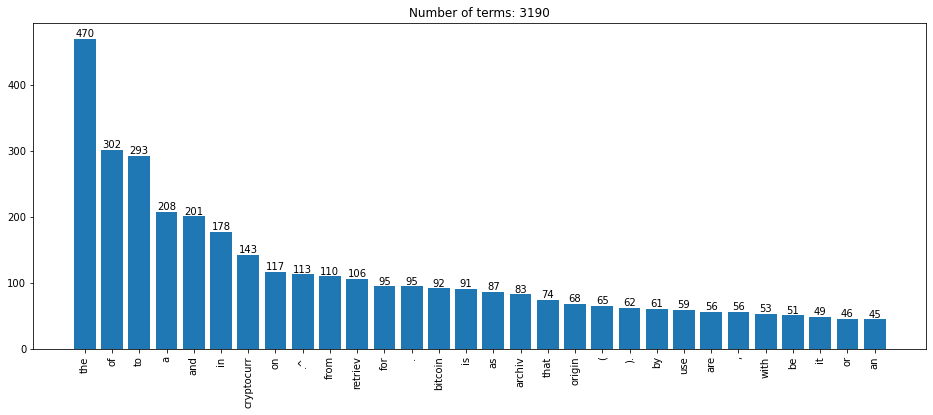

In [43]:
plot_words(stemmed.split())

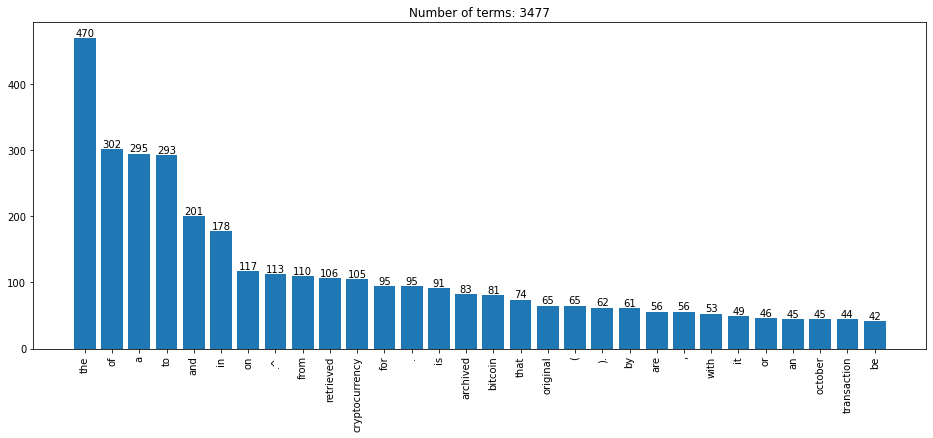

In [44]:
plot_words(lemma.split())

## Modelling : Word2Vec

In [45]:
# ### use for text file
# import glob
# book_filenames = sorted(glob.glob("crypto.txt"))

In [46]:
# pwd

In [47]:
# print("Found books:")
# book_filenames

In [48]:
# import codecs
# corpus_raw = u""
# for book_filename in book_filenames:
#     print("Reading '{0}'...".format(book_filename))
#     with codecs.open(book_filename, "r", "utf-8") as book_file:
#         corpus_raw += book_file.read()
#     print("Corpus is now {0} characters long".format(len(corpus_raw)))
#     print()

**Set up logging**

In [49]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

**Split the corpus into sentences**

In [50]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [51]:
# use 'cleantext' if directly from URL
# use 'corpus_raw' if .txt
raw_sentences = tokenizer.tokenize(cleantext)

In [52]:
raw_sentences

['cryptocurrencyfrom wikipedia, the free encyclopediajump to navigationjump to searchencrypted medium of digital exchangenot to be confused with virtual currency.',
 'a logo for bitcoin, the first decentralized cryptocurrencya cryptocurrency, crypto-currency, or crypto is a collection of binary data which is designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger which is a computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership.',
 '[][][] cryptocurrencies are generally fiat currencies, as they are not backed by or convertible into a commodity.',
 '[] some crypto schemes use validators to maintain the cryptocurrency.',
 'in a proof-of-stake model, owners put up their tokens as collateral.',
 'in return, they get authority over the token in proportion to the amount they stake.',
 'generally, these token stakers get additional

In [53]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [54]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [55]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

in return, they get authority over the token in proportion to the amount they stake.
['in', 'return', 'they', 'get', 'authority', 'over', 'the', 'token', 'in', 'proportion', 'to', 'the', 'amount', 'they', 'stake']


In [56]:
token = sentence_to_wordlist(raw_sentences[5])

In [57]:
token

['in',
 'return',
 'they',
 'get',
 'authority',
 'over',
 'the',
 'token',
 'in',
 'proportion',
 'to',
 'the',
 'amount',
 'they',
 'stake']

In [58]:
sentences

[['cryptocurrencyfrom',
  'wikipedia',
  'the',
  'free',
  'encyclopediajump',
  'to',
  'navigationjump',
  'to',
  'searchencrypted',
  'medium',
  'of',
  'digital',
  'exchangenot',
  'to',
  'be',
  'confused',
  'with',
  'virtual',
  'currency'],
 ['a',
  'logo',
  'for',
  'bitcoin',
  'the',
  'first',
  'decentralized',
  'cryptocurrencya',
  'cryptocurrency',
  'crypto',
  'currency',
  'or',
  'crypto',
  'is',
  'a',
  'collection',
  'of',
  'binary',
  'data',
  'which',
  'is',
  'designed',
  'to',
  'work',
  'as',
  'a',
  'medium',
  'of',
  'exchange',
  'wherein',
  'individual',
  'coin',
  'ownership',
  'records',
  'are',
  'stored',
  'in',
  'a',
  'ledger',
  'which',
  'is',
  'a',
  'computerized',
  'database',
  'using',
  'strong',
  'cryptography',
  'to',
  'secure',
  'transaction',
  'records',
  'to',
  'control',
  'the',
  'creation',
  'of',
  'additional',
  'coins',
  'and',
  'to',
  'verify',
  'the',
  'transfer',
  'of',
  'coin',
  'own

In [59]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 10,610 tokens


In [60]:
token_count

10610

In [61]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [62]:
# *** Migrating to Gensim 4.0, 'size' change to 'vector_size'
# Check  this  link for updated function : https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
cryptovec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    vector_size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

2021-11-13 08:41:59,585 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.025)', 'datetime': '2021-11-13T08:41:59.584962', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [63]:
cryptovec.build_vocab(sentences)

2021-11-13 08:42:00,087 : INFO : collecting all words and their counts
2021-11-13 08:42:00,088 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-11-13 08:42:00,092 : INFO : collected 2866 word types from a corpus of 10610 raw words and 784 sentences
2021-11-13 08:42:00,093 : INFO : Creating a fresh vocabulary
2021-11-13 08:42:00,099 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 retains 681 unique words (23.761339846475924%% of original 2866, drops 2185)', 'datetime': '2021-11-13T08:42:00.099736', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-11-13 08:42:00,100 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 leaves 8006 word corpus (75.45711592836946%% of original 10610, drops 2604)', 'datetime': '2021-11-13T08:42:00.100732', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC 

In [64]:
print("Word2Vec vocabulary length:", len(cryptovec.wv))

Word2Vec vocabulary length: 681


In [65]:
cryptovec.train(sentences, total_examples=cryptovec.corpus_count,epochs=cryptovec.epochs)

2021-11-13 08:42:01,387 : INFO : Word2Vec lifecycle event {'msg': 'training model with 4 workers on 681 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7 shrink_windows=True', 'datetime': '2021-11-13T08:42:01.387912', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'train'}
2021-11-13 08:42:01,397 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-11-13 08:42:01,398 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-11-13 08:42:01,522 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-11-13 08:42:01,559 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-11-13 08:42:01,560 : INFO : EPOCH - 1 : training on 10610 raw words (5434 effective words) took 0.2s, 32948 effective words/s
2021-11-13 08:42:01,571 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-11-13

(27248, 53050)

In [66]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [67]:
cryptovec.save(os.path.join("trained", "cryptovec.w2v"))

2021-11-13 08:42:02,446 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'trained\\cryptovec.w2v', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-11-13T08:42:02.446029', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2021-11-13 08:42:02,448 : INFO : not storing attribute cum_table
2021-11-13 08:42:02,453 : INFO : saved trained\cryptovec.w2v


#### Dimentnsion Reduction by Compress the Word Vectors into 2D Space 

In [72]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [73]:
all_word_vectors_matrix = cryptovec.wv.vectors

In [74]:
all_word_vectors_matrix 

array([[ 0.02483323,  0.10666275, -0.04023816, ..., -0.14529487,
         0.05161864, -0.063902  ],
       [ 0.02162544,  0.12015454, -0.04786569, ..., -0.16426237,
         0.05242715, -0.07140438],
       [ 0.02826263,  0.11576059, -0.04793122, ..., -0.1599394 ,
         0.05382827, -0.07088552],
       ...,
       [ 0.01722368,  0.07344217, -0.02927952, ..., -0.10227925,
         0.03001831, -0.03809785],
       [ 0.01619451,  0.07641216, -0.03286104, ..., -0.10318189,
         0.0360676 , -0.04177939],
       [ 0.01633287,  0.08622088, -0.03660669, ..., -0.12097787,
         0.04018068, -0.05079344]], dtype=float32)

In [75]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [76]:
vec_2d = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[cryptovec.wv.key_to_index[word]])
            for word in cryptovec.wv.key_to_index
        ]
    ],
    columns=["word", "x", "y"]
)

In [77]:
vec_2d.head(10)

,word,x,y
0,the,-0.985628,16.067461
1,of,-26.466698,19.821159
2,to,-26.984898,19.604012
3,a,-16.655165,22.116199
4,and,-24.559811,20.915604
5,in,-24.749561,21.024103
6,bitcoin,-11.177739,19.250587
7,cryptocurrency,-23.926159,18.193027
8,on,22.796467,10.191589
9,from,25.585503,-3.853358


In [78]:
sns.set_context("poster")

<AxesSubplot:xlabel='x', ylabel='y'>

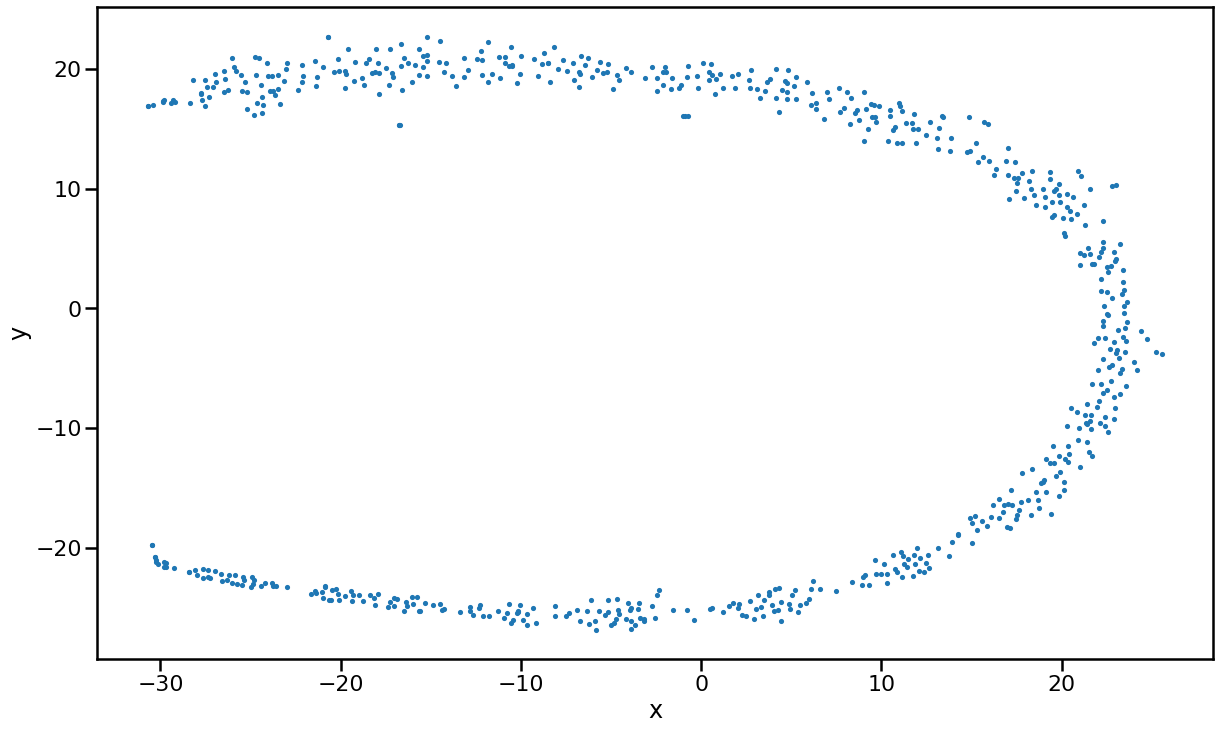

In [79]:
vec_2d.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [80]:
def plot_region(x_bounds, y_bounds):
    slice = vec_2d[
        (x_bounds[0] <= vec_2d.x) &
        (vec_2d.x <= x_bounds[1]) & 
        (y_bounds[0] <= vec_2d.y) &
        (vec_2d.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(18, 12))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.010, point.y + 0.010, point.word, fontsize=11)

2021-11-13 08:43:03,535 : INFO : NumExpr defaulting to 4 threads.


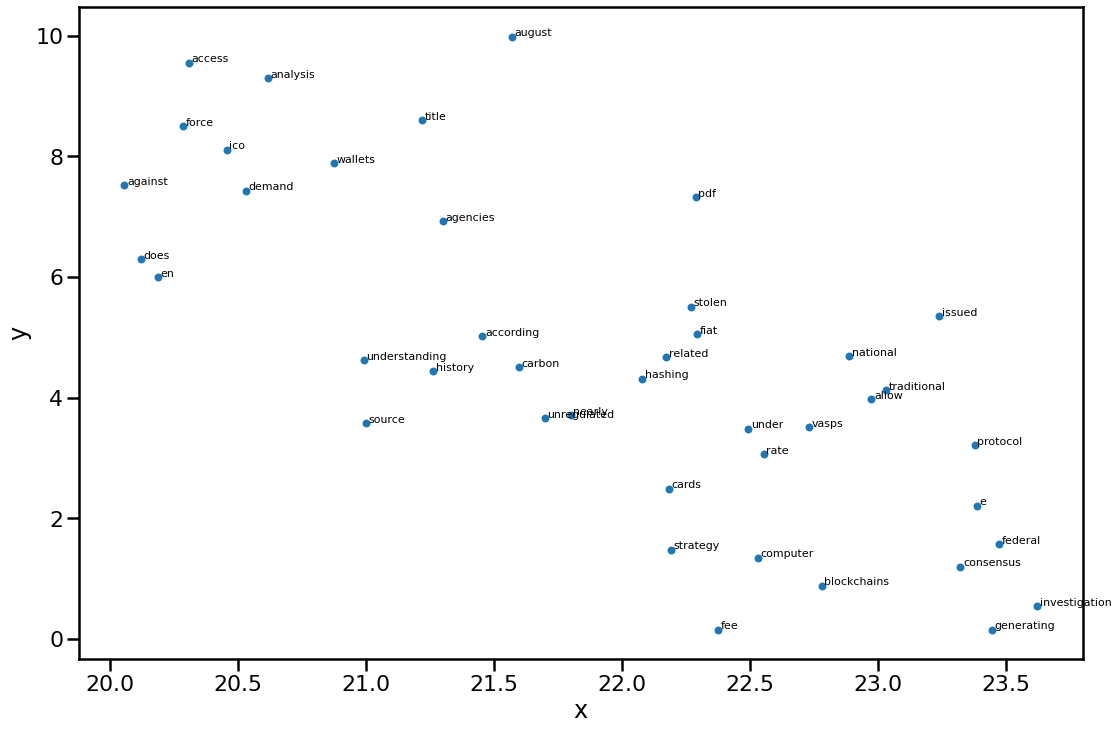

In [81]:
plot_region(x_bounds=(20, 30), y_bounds=(0, 10))

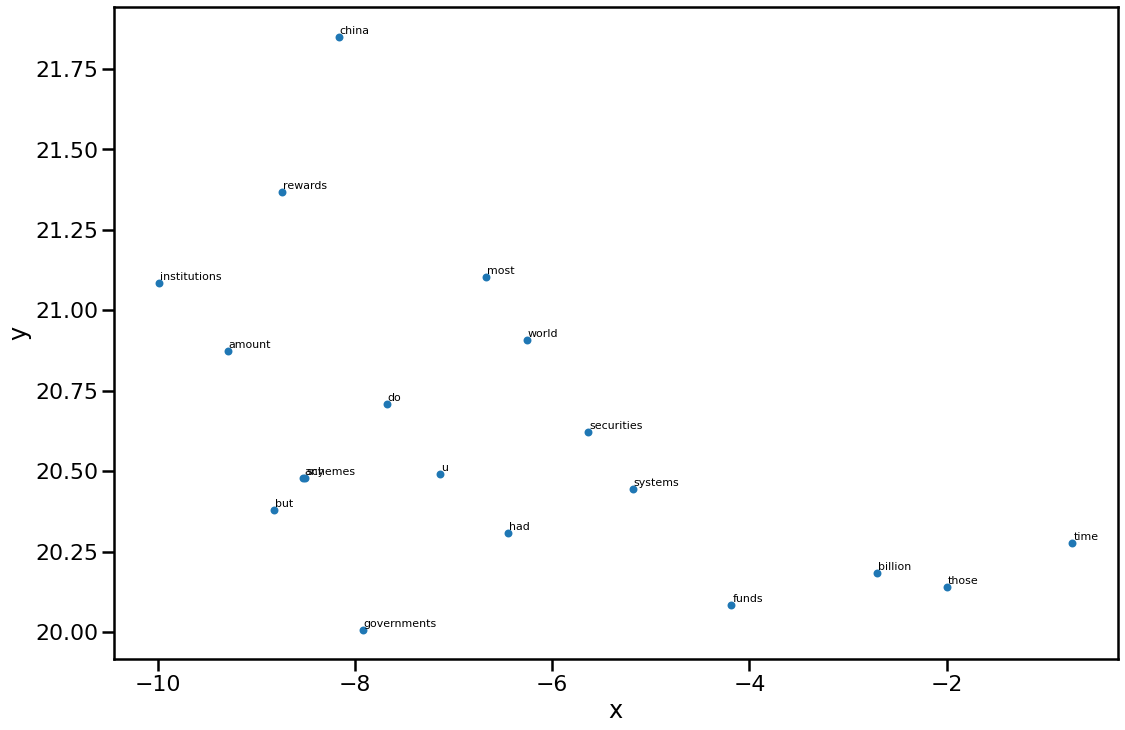

In [82]:
plot_region(x_bounds=(-10, 0), y_bounds=(20, 30))

#### Explore semantic similarities between  characters

In [83]:
cryptovec.wv.most_similar("bitcoin")

[('would', 0.9993902444839478),
 ('information', 0.9993652105331421),
 ('increased', 0.9993647933006287),
 ('used', 0.9993578195571899),
 ('many', 0.999352753162384),
 ('energy', 0.9993519186973572),
 ('more', 0.999350368976593),
 ('banking', 0.9993470311164856),
 ('one', 0.9993419647216797),
 ('scheme', 0.9993396997451782)]

In [84]:
cryptovec.wv.most_similar("cryptocurrency")

[('over', 0.9994188547134399),
 ('than', 0.9994045495986938),
 ('trade', 0.9993767738342285),
 ('this', 0.9993732571601868),
 ('must', 0.99936842918396),
 ('when', 0.9993610978126526),
 ('services', 0.9993578791618347),
 ('u', 0.9993488788604736),
 ('potential', 0.9993473887443542),
 ('us', 0.9993464946746826)]

In [85]:
cryptovec.wv.most_similar("blockchain")

[('through', 0.9993631839752197),
 ('is', 0.9993180632591248),
 ('users', 0.9993136525154114),
 ('global', 0.9992913007736206),
 ('decentralized', 0.9992882609367371),
 ('about', 0.9992837905883789),
 ('not', 0.9992828369140625),
 ('two', 0.9992768168449402),
 ('ledger', 0.9992724061012268),
 ('other', 0.9992713332176208)]

In [86]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = cryptovec.wv.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [87]:
nearest_similarity_cosmul("mining", "bitcoin", "blockchain")

mining is related to bitcoin, as through is related to blockchain


'through'

## Clustering by K-Means

In [88]:
#create new data frame from raw
column1 = raw_sentences
df = pd.DataFrame({'sentence':column1})
print (df)

                                              sentence
0    cryptocurrencyfrom wikipedia, the free encyclo...
1    a logo for bitcoin, the first decentralized cr...
2    [][][] cryptocurrencies are generally fiat cur...
3    [] some crypto schemes use validators to maint...
4    in a proof-of-stake model, owners put up their...
..                                                 ...
779  "blockchains and bitcoin: regulatory responses...
780                                      first monday.
781                                                ().
782  doi:./fm.vi.. scid .external links media relat...
783  goxquadrigacxhistorybitcoin scalability proble...

[784 rows x 1 columns]


In [89]:
df.head()

,sentence
0,"cryptocurrencyfrom wikipedia, the free encyclo..."
1,"a logo for bitcoin, the first decentralized cr..."
2,[][][] cryptocurrencies are generally fiat cur...
3,[] some crypto schemes use validators to maint...
4,"in a proof-of-stake model, owners put up their..."


In [90]:
# Generating bag of words features by countvectorizer

count_vect = CountVectorizer()
bow = count_vect.fit_transform(df['sentence'].values)
bow.shape

(784, 2843)

In [91]:
bow

<784x2843 sparse matrix of type '<class 'numpy.int64'>'
	with 9221 stored elements in Compressed Sparse Row format>

In [92]:
terms = count_vect.get_feature_names()

In [93]:
terms[1:10]

['able',
 'abound',
 'about',
 'absolute',
 'ac',
 'academic',
 'academicretrieved',
 'accept',
 'accepting']

In [94]:
terms

['_en',
 'able',
 'abound',
 'about',
 'absolute',
 'ac',
 'academic',
 'academicretrieved',
 'accept',
 'accepting',
 'access',
 'accessed',
 'accordance',
 'according',
 'account',
 'accountbusiness',
 'accounting',
 'accountlegal',
 'accounts',
 'accurately',
 'achieve',
 'achieved',
 'achieving',
 'acknowledged',
 'across',
 'action',
 'activities',
 'activity',
 'actor',
 'actors',
 'actually',
 'acyclic',
 'adamović',
 'adapt',
 'add',
 'added',
 'adding',
 'additional',
 'additionally',
 'additions',
 'address',
 'addresses',
 'adds',
 'adhering',
 'administrators',
 'admittedly',
 'adopt',
 'adopting',
 'adoption',
 'adoptioncryptocurrencies',
 'ads',
 'advanced',
 'advancement',
 'advertisements',
 'advertising',
 'adverts',
 'adviser',
 'advising',
 'advisors',
 'affect',
 'afford',
 'africa',
 'african',
 'africasouth',
 'africrypt',
 'after',
 'against',
 'agencies',
 'agenciesa',
 'agency',
 'agent',
 'aggressive',
 'agnolo',
 'agreement',
 'aid',
 'aimed',
 'aims',
 'al',

In [95]:
# Clustering by k means
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(n_clusters=10, n_jobs=-1, random_state=99)

In [96]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [97]:
cluster_center

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00719424,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03448276, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [99]:
silhouette_score

0.06751530562250536

In [100]:
df = df
df['bow_label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

,sentence,bow_label
0,"cryptocurrencyfrom wikipedia, the free encyclo...",3
1,"a logo for bitcoin, the first decentralized cr...",7


In [101]:
df.groupby(['bow_label'])['sentence'].count()

bow_label
0     71
1      1
2    139
3     23
4      1
5      1
6    514
7      4
8     29
9      1
Name: sentence, dtype: int64

In [102]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :4]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: the
 archived
 on
 from
Cluster 1: the
 node
 transaction
 network
Cluster 2: the
 of
 in
 to
Cluster 3: to
 the
 in
 for
Cluster 4: in
 the
 by
 attack
Cluster 5: the
 archived
 machine
 wayback
Cluster 6: retrieved
 to
 bitcoin
 of
Cluster 7: of
 to
 the
 in
Cluster 8: the
 of
 to
 in
Cluster 9: of
 from
 with
 articles


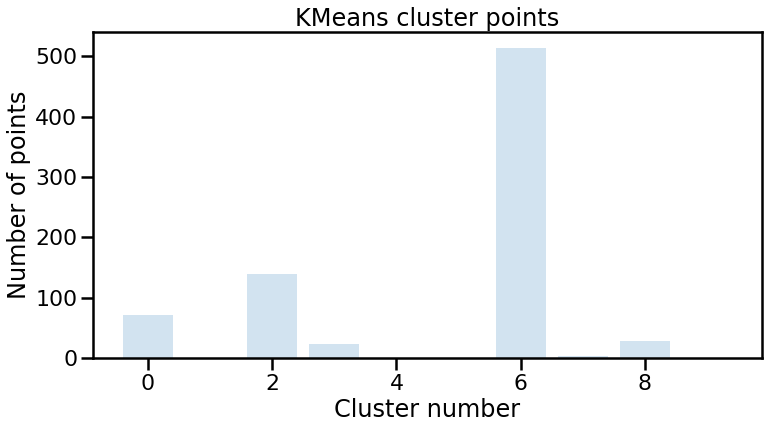

In [103]:
import matplotlib.pyplot as plt
ax = plt.subplots(figsize=(12,6))
plt.bar([x for x in range(10)], df.groupby(['bow_label'])['sentence'].count(), alpha = 0.2)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [104]:
# Reading a review which belong to each group.
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['bow_label']).groups[i][0]]['sentence'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
[][]on  june , the basel committee on banking supervision proposed that banks that held cryptocurrency assets must set aside capital to cover all potential losses.


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
in terms of relaying transactions each network computer (node) has a copy of the blockchain of the cryptocurrency it supports, when a transaction is made the node creating the transaction broadcasts details of the transaction using encryption to other nodes throughout the node network so that the transaction (and every other transaction) is known.node owners are either volunteers, those hosted by the organisation or body responsible for developing the cryptocurrency blockchain network technology or those that are enticed to host a node to receiv

In [105]:
#considers sample of 3 random reviews for cluster 0

print(df.iloc[df.groupby(['bow_label']).groups[0][10]]['sentence'])
print("_" * 70)
print(df.iloc[df.groupby(['bow_label']).groups[0][5]]['sentence'])
print("_" * 70)
print(df.iloc[df.groupby(['bow_label']).groups[0][2]]['sentence'])

archived from the original on  october .
______________________________________________________________________
archived from the original on  october .^ sagona-stophel, katherine.
______________________________________________________________________
this precludes the cryptocurrency from being spent, resulting in its effective removal from the markets.


In [106]:
#consider sample of 3 random reviews for cluster 4

print(df.iloc[df.groupby(['bow_label']).groups[3][3]]['sentence'])
print("_" * 70)
print(df.iloc[df.groupby(['bow_label']).groups[3][12]]['sentence'])
print("_" * 70)
print(df.iloc[df.groupby(['bow_label']).groups[3][13]]['sentence'])

[] within a proof-of-work cryptocurrency system such as bitcoin, the safety, integrity and balance of ledgers is maintained by a community of mutually distrustful parties referred to as miners: who use their computers to help validate and timestamp transactions, adding them to the ledger in accordance with a particular timestamping scheme.
______________________________________________________________________
[]by mid-june  cryptocurrency as an admittedly extremely volatile asset class for portfolio diversification had begun to be offered by some wealth managers in the us for (k)s.[][][]increased regulation in the rise in the popularity of cryptocurrencies and their adoption by financial institutions has led some governments to assess whether regulation is needed to protect users.
______________________________________________________________________
for instance, if a bank were to hold bitcoin worth $ billion, it would be required to set aside enough capital to cover the entire $ bill

## Clustering by Kmeans after dimension reduction*

In [107]:
drop_features = ['word']
X = vec_2d.drop(drop_features, axis = 1)

In [108]:
X

,x,y
0,-0.985628,16.067461
1,-26.466698,19.821159
2,-26.984898,19.604012
3,-16.655165,22.116199
4,-24.559811,20.915604
...,...,...
676,-5.196728,-24.334244
677,-25.866766,-22.293636
678,-17.268051,-24.554644
679,-10.430850,-26.003864


In [109]:
scaler = StandardScaler()
Xss = scaler.fit_transform(X)

In [110]:
# 2 Clusters
k= 5
kmeans_5 = KMeans(n_clusters=k).fit(Xss)

In [111]:
# ANSWER
labels_5 = kmeans_5.labels_
print(labels_5)

[3 0 0 0 0 0 0 0 2 2 3 0 0 0 2 0 0 1 0 0 0 0 0 0 3 0 2 2 0 0 0 0 3 0 0 3 0
 0 0 0 3 2 0 0 0 0 0 3 0 3 2 0 0 0 3 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 0 3 3 3 0 0 0 0 0 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0
 0 3 0 3 0 0 0 0 3 0 3 3 3 0 3 0 0 0 3 0 3 0 0 0 0 3 0 0 3 0 3 3 3 0 0 0 3
 4 0 0 0 3 3 2 3 0 3 3 0 0 0 0 3 2 0 0 0 3 1 3 0 0 0 3 3 3 3 0 3 3 0 3 0 0
 0 3 0 3 0 0 3 0 3 2 3 2 2 3 3 0 0 3 3 2 0 2 0 0 3 2 3 0 0 3 3 3 2 3 3 2 3
 3 3 0 3 0 3 3 0 3 0 0 3 2 0 3 3 3 2 3 3 3 2 4 2 3 3 0 2 3 3 2 2 2 3 3 3 3
 2 3 2 3 2 2 2 2 3 3 2 4 3 2 3 3 2 2 0 2 4 3 2 2 2 4 1 2 3 4 2 2 3 3 4 2 1
 3 2 2 3 2 4 2 2 3 4 2 1 4 4 2 2 4 2 4 3 2 2 4 2 2 3 3 3 1 3 2 4 2 2 3 4 2
 3 3 2 4 2 3 2 3 3 1 2 3 2 1 2 2 4 2 3 3 2 2 3 4 0 1 2 4 4 2 2 2 2 2 4 4 4
 2 4 2 3 1 4 1 2 1 1 2 1 3 1 4 2 3 1 4 1 4 4 3 2 4 1 4 4 1 4 1 1 1 1 4 2 4
 1 1 2 3 4 2 4 2 2 2 2 2 4 1 4 2 4 2 2 2 4 1 4 3 1 2 4 3 4 4 2 1 2 2 2 2 2
 1 4 2 2 2 2 4 1 4 2 4 3 1 4 2 3 4 2 3 1 2 1 2 2 4 1 4 2 4 4 1 2 2 2 4 4 1
 2 2 2 4 2 2 4 1 4 1 1 1 

In [112]:
kmeans_5.cluster_centers_

array([[-1.11228706,  1.09084945],
       [-0.93210658, -1.23718045],
       [ 1.24215076,  0.14842273],
       [ 0.263167  ,  0.99247441],
       [ 0.68154044, -1.01572558]])

In [113]:
kmeans_5.n_iter_

12

In [114]:
kmeans_5.inertia_

126.81115656816134

Text(0.5, 1.0, 'Actual Classification')

<Figure size 1152x432 with 0 Axes>

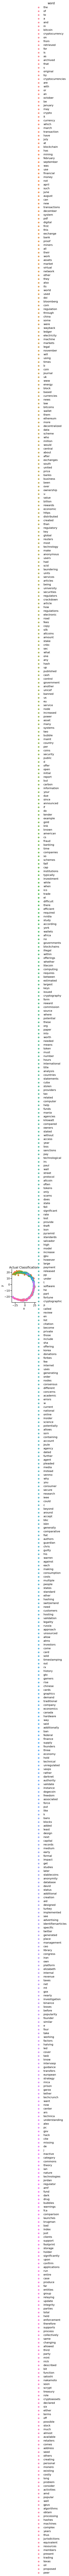

In [115]:
ais_labels = vec_2d
ais_labels['labels'] = labels_5
plt.figure(figsize = (16, 6))
sns.lmplot(x='x', y='y', data=ais_labels, hue='word', fit_reg=False)
plt.title('Actual Classification')


### Clustering by Kmeans after Dimension Reduction by PCA

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [117]:
pca = PCA(n_components =10)

In [118]:
all_word_vectors_matrix = cryptovec.wv.vectors

In [119]:
all_word_vectors_matrix_2d_pca = pca.fit_transform(all_word_vectors_matrix)

In [120]:
vec_pca = pd.DataFrame(
    [
        (word, coords[0], coords[1],coords[2], coords[3], coords[4], coords[5], coords[6], coords[7], coords[8], coords[9])
        for word, coords in [
            (word, all_word_vectors_matrix_2d_pca[cryptovec.wv.key_to_index[word]])
            for word in cryptovec.wv.key_to_index
        ]
    ],
    columns=["word", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
)

In [121]:
vec_pca.head()

,word,1,2,3,4,5,6,7,8,9,10
0,the,-0.154451,0.028693,0.019471,-0.004082,-0.004143,0.008308,-0.008436,-0.001418,-0.009583,0.008867
1,of,-0.271760,-0.012145,0.016985,0.006178,0.010757,0.004496,-0.001531,0.002411,-0.001198,0.003704
2,to,-0.274382,-0.013759,0.011882,-0.002356,0.003173,0.000518,-0.003265,-0.008474,-0.004486,-0.004887
3,a,-0.226167,-0.008294,0.011956,0.005142,-0.005651,0.005178,0.009282,-0.009229,-0.006135,0.002056
4,and,-0.260722,-0.009710,0.015882,-0.005560,0.006931,0.000566,-0.003887,0.001127,-0.001129,0.002174


In [122]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(vec_pca['word'].values)
bow.shape

(681, 669)

In [123]:
bow

<681x669 sparse matrix of type '<class 'numpy.int64'>'
	with 669 stored elements in Compressed Sparse Row format>

In [124]:
terms = count_vect.get_feature_names()

In [125]:
terms[1:10]

['academic',
 'accept',
 'access',
 'according',
 'account',
 'activities',
 'added',
 'additional',
 'additionally']

In [126]:
terms

['about',
 'academic',
 'accept',
 'access',
 'according',
 'account',
 'activities',
 'added',
 'additional',
 'additionally',
 'address',
 'advertising',
 'africa',
 'after',
 'against',
 'agencies',
 'agency',
 'agent',
 'aid',
 'alex',
 'algorithms',
 'all',
 'allow',
 'allowed',
 'allows',
 'almost',
 'also',
 'altcoin',
 'altcoins',
 'amd',
 'american',
 'amf',
 'amount',
 'an',
 'analysis',
 'and',
 'announced',
 'anonymity',
 'anonymous',
 'another',
 'any',
 'applications',
 'approach',
 'april',
 'archived',
 'are',
 'around',
 'ars',
 'article',
 'articles',
 'as',
 'asset',
 'assets',
 'associated',
 'at',
 'atms',
 'august',
 'authority',
 'authors',
 'available',
 'bad',
 'ban',
 'bank',
 'banking',
 'banks',
 'banned',
 'bans',
 'based',
 'bbc',
 'be',
 'become',
 'been',
 'before',
 'being',
 'between',
 'beyond',
 'billion',
 'binance',
 'bit',
 'bitcoin',
 'bitcoins',
 'block',
 'blockchain',
 'blockchains',
 'blocks',
 'bloomberg',
 'bubble',
 'bubbles',
 'business',

In [127]:
# Clustering by k means
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(n_clusters=10, n_jobs=-1, random_state=99)

In [128]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [129]:
cluster_center

array([[0.0014881, 0.0014881, 0.0014881, ..., 0.0014881, 0.0014881,
        0.0014881],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [130]:
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [131]:
silhouette_score

0.005365376797511403

In [132]:
df = vec_pca
df['bow_label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

,word,1,2,3,4,5,6,7,8,9,10,bow_label
0,the,-0.154451,0.028693,0.019471,-0.004082,-0.004143,0.008308,-0.008436,-0.001418,-0.009583,0.008867,0
1,of,-0.271760,-0.012145,0.016985,0.006178,0.010757,0.004496,-0.001531,0.002411,-0.001198,0.003704,0


In [133]:
df.groupby(['bow_label'])['word'].count()

bow_label
0    672
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
Name: word, dtype: int64

In [134]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :4]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: your
 form
 forbes
 for
Cluster 1: impact
 federal
 footprint
 first
Cluster 2: rewards
 your
 federal
 footprint
Cluster 3: dark
 your
 federal
 footprint
Cluster 4: payment
 forbes
 for
 footprint
Cluster 5: so
 your
 fee
 footprint
Cluster 6: number
 your
 for
 footprint
Cluster 7: satoshi
 your
 federal
 footprint
Cluster 8: ether
 your
 federal
 footprint
Cluster 9: this
 your
 federal
 footprint


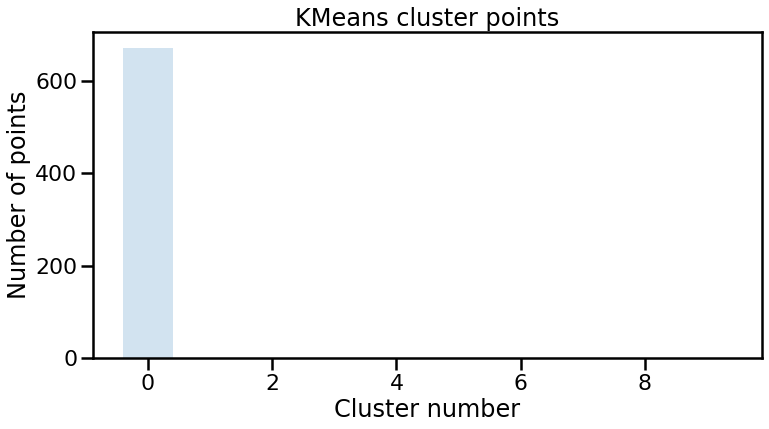

In [135]:
import matplotlib.pyplot as plt
ax = plt.subplots(figsize=(12,6))
plt.bar([x for x in range(10)], df.groupby(['bow_label'])['word'].count(), alpha = 0.2)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [136]:
# Reading a review which belong to each group.
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['bow_label']).groups[i][0]]['word'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
the


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
impact


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
rewards


______________________________________________________________________
A review of assigned to cluster  3
----------------------------------------------------------------------
dark


______________________________________________________________________
A review of assigned to cluster  4
----------------------------------------------------------------------
payment


______________________________________________________________________
A review of assigned to cluster  5
--------------------------------------